In [1]:
import torch
import numpy as np
import random
import torch.nn as nn
import torch.nn.functional as F
import itertools
import pdb
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import sys

sys.path.insert(0, './src')

from data import Dataset
from kernels import HMC_our, HMC_vanilla
from models import Gen_network, Inf_network
from target import NN_bernoulli
from utils import plot_digit_samples, get_samples
from args import get_args
import pyro
from pyro.distributions.transforms import AffineAutoregressive
from pyro.nn import AutoRegressiveNN

In [2]:
args = get_args()

In [3]:
dataset = Dataset(args, device=args.device)

In [4]:
encoder = Inf_network(args).to(args.device)
target = NN_bernoulli(kwargs=args, model=Gen_network(args.z_dim, args), device=args.device).to(args.device)
HMC = HMC_vanilla(args)
# IAF = nn.ModuleList([AffineAutoregressive(AutoRegressiveNN(args['z_dim'], [384])).to(device) for _ in range(K)])

In [5]:
params = [encoder.parameters()] #, IAF.parameters()]
optimizer_phi = torch.optim.Adam(params=itertools.chain(*params))
optimizer_theta = torch.optim.Adam(params=target.parameters())

In [6]:
mask_distr = torch.distributions.Uniform(torch.tensor(0.0, device=args.device),
                                                      torch.tensor(1.0, device=args.device))

In [7]:
random_code = args.std_normal.sample((64, args.z_dim))

  0%|          | 0/400 [00:00<?, ?it/s]

obj_1: -199.16323852539062
obj_2: -286.8800354003906
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


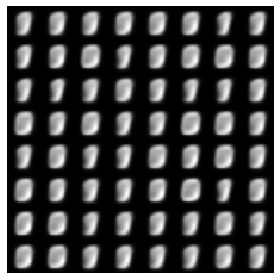

  0%|          | 1/400 [00:20<2:18:18, 20.80s/it]

obj_1: -184.24636840820312
obj_2: -264.97625732421875
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


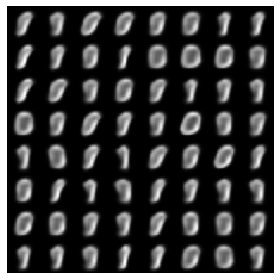

  0%|          | 2/400 [00:41<2:17:34, 20.74s/it]

obj_1: -149.494140625
obj_2: -224.9366912841797
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


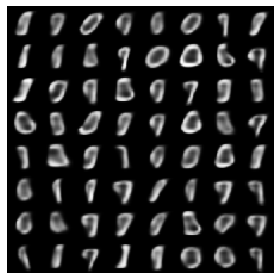

  1%|          | 3/400 [01:02<2:16:59, 20.70s/it]

obj_1: -136.61209106445312
obj_2: -203.28985595703125
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


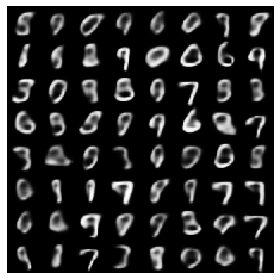

  1%|          | 4/400 [01:22<2:16:28, 20.68s/it]

obj_1: -124.10169982910156
obj_2: -189.57254028320312
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


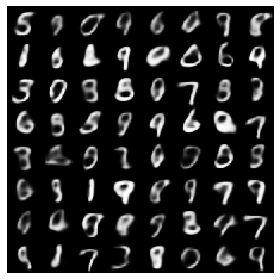

  1%|▏         | 5/400 [01:43<2:15:59, 20.66s/it]

obj_1: -131.99375915527344
obj_2: -192.03466796875
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


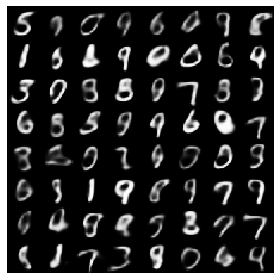

  2%|▏         | 6/400 [02:03<2:15:46, 20.68s/it]

obj_1: -129.37083435058594
obj_2: -185.02288818359375
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


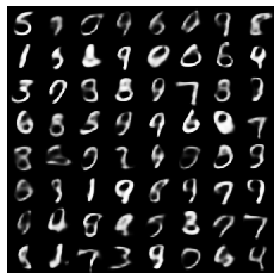

  2%|▏         | 7/400 [02:24<2:15:33, 20.70s/it]

obj_1: -122.9189224243164
obj_2: -178.9241485595703
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


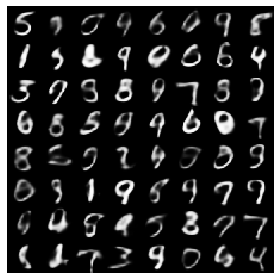

  2%|▏         | 8/400 [02:45<2:15:19, 20.71s/it]

obj_1: -120.53498077392578
obj_2: -175.65719604492188
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


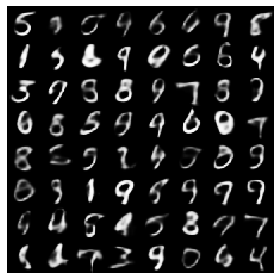

  2%|▏         | 9/400 [03:06<2:15:00, 20.72s/it]

obj_1: -128.30728149414062
obj_2: -179.85104370117188
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


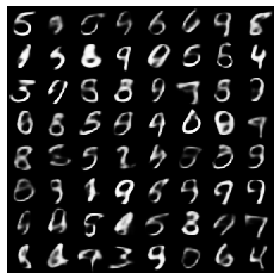

  2%|▎         | 10/400 [03:26<2:14:41, 20.72s/it]

obj_1: -122.6948013305664
obj_2: -175.13087463378906
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


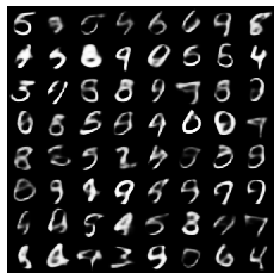

  3%|▎         | 11/400 [03:47<2:14:28, 20.74s/it]

obj_1: -119.96685028076172
obj_2: -170.81814575195312
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


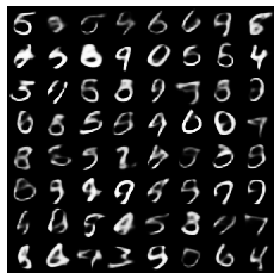

  3%|▎         | 12/400 [04:08<2:14:17, 20.77s/it]

obj_1: -117.71495819091797
obj_2: -169.84104919433594
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


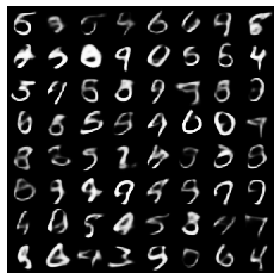

  3%|▎         | 13/400 [04:29<2:14:18, 20.82s/it]

obj_1: -119.941162109375
obj_2: -171.78872680664062
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


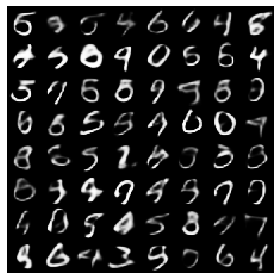

  4%|▎         | 14/400 [04:50<2:14:24, 20.89s/it]

obj_1: -114.85623931884766
obj_2: -165.08206176757812
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


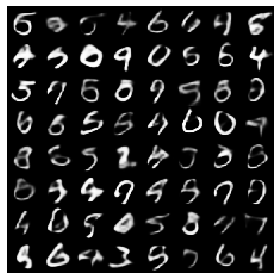

  4%|▍         | 15/400 [05:11<2:15:00, 21.04s/it]

obj_1: -116.68632507324219
obj_2: -168.47933959960938
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


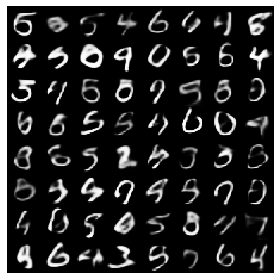

  4%|▍         | 16/400 [05:33<2:15:07, 21.11s/it]

obj_1: -116.30560302734375
obj_2: -166.62249755859375
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


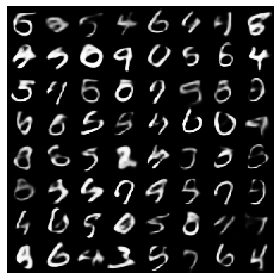

  4%|▍         | 17/400 [05:54<2:15:04, 21.16s/it]

obj_1: -118.05570220947266
obj_2: -166.89767456054688
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


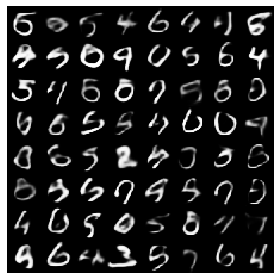

  4%|▍         | 18/400 [06:15<2:14:57, 21.20s/it]

obj_1: -120.05064392089844
obj_2: -169.61331176757812
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


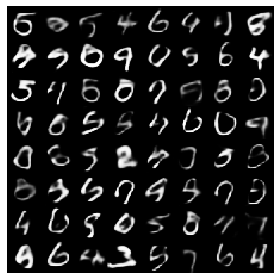

  5%|▍         | 19/400 [06:37<2:14:42, 21.21s/it]

obj_1: -115.45673370361328
obj_2: -164.7373809814453
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


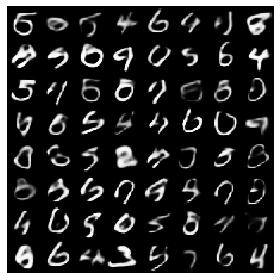

  5%|▌         | 20/400 [06:58<2:14:21, 21.21s/it]

obj_1: -112.2166748046875
obj_2: -163.1586456298828
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


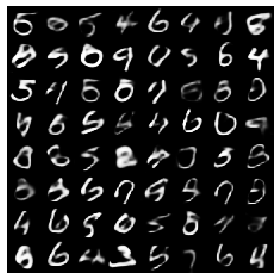

  5%|▌         | 21/400 [07:18<2:13:05, 21.07s/it]

obj_1: -117.32711029052734
obj_2: -166.20726013183594
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


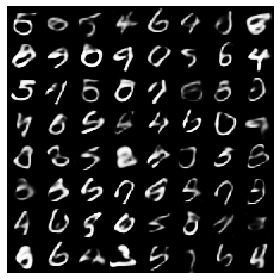

  6%|▌         | 22/400 [07:39<2:12:10, 20.98s/it]

obj_1: -114.17330169677734
obj_2: -165.833740234375
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


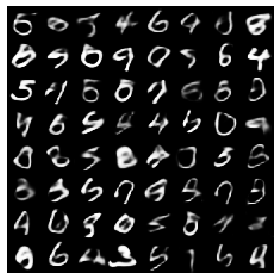

  6%|▌         | 23/400 [08:00<2:11:23, 20.91s/it]

obj_1: -114.20018005371094
obj_2: -165.67953491210938
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


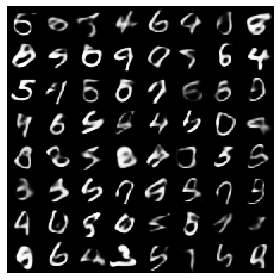

  6%|▌         | 24/400 [08:21<2:10:41, 20.86s/it]

obj_1: -116.96904754638672
obj_2: -165.77833557128906
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


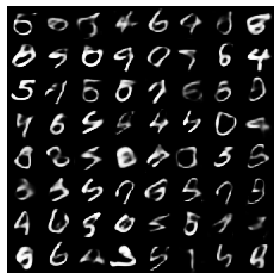

  6%|▋         | 25/400 [08:41<2:10:12, 20.83s/it]

obj_1: -117.70508575439453
obj_2: -166.37249755859375
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


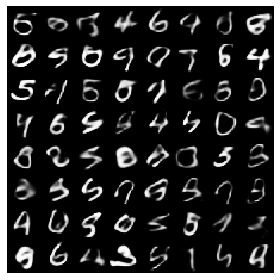

  6%|▋         | 26/400 [09:02<2:09:40, 20.80s/it]

obj_1: -117.66756439208984
obj_2: -166.415283203125
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


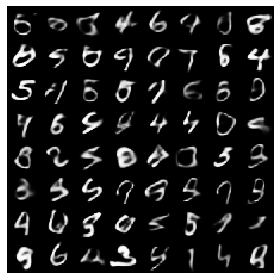

  7%|▋         | 27/400 [09:23<2:09:12, 20.78s/it]

obj_1: -115.5400390625
obj_2: -163.06268310546875
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


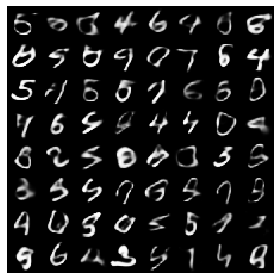

  7%|▋         | 28/400 [09:44<2:08:45, 20.77s/it]

obj_1: -109.69165802001953
obj_2: -161.6188507080078
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


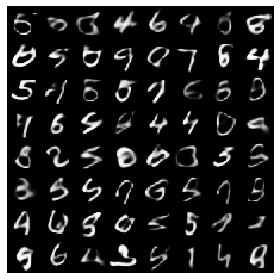

  7%|▋         | 29/400 [10:04<2:08:20, 20.76s/it]

obj_1: -119.03840637207031
obj_2: -167.40576171875
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


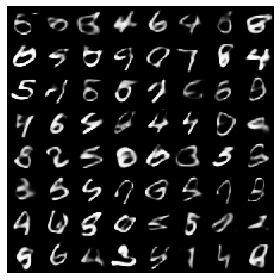

  8%|▊         | 30/400 [10:25<2:07:56, 20.75s/it]

obj_1: -109.09066009521484
obj_2: -158.82455444335938
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


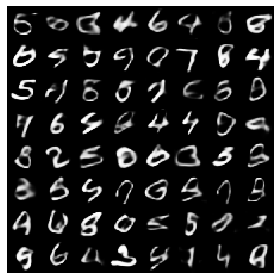

  8%|▊         | 31/400 [10:46<2:07:33, 20.74s/it]

obj_1: -113.02464294433594
obj_2: -160.5438690185547
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


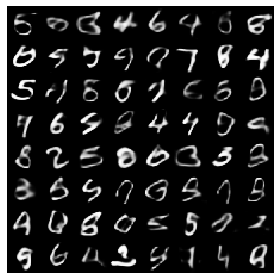

  8%|▊         | 32/400 [11:07<2:07:11, 20.74s/it]

obj_1: -112.54914855957031
obj_2: -161.33811950683594
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


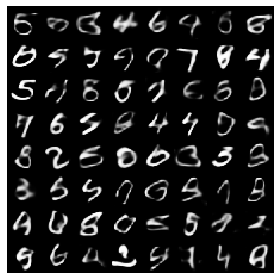

  8%|▊         | 33/400 [11:27<2:06:50, 20.74s/it]

obj_1: -114.29346466064453
obj_2: -163.455810546875
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


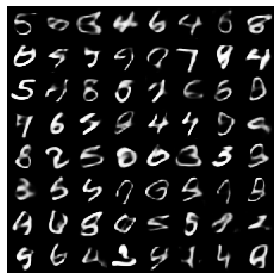

  8%|▊         | 34/400 [11:48<2:06:28, 20.73s/it]

obj_1: -114.69908142089844
obj_2: -162.49026489257812
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


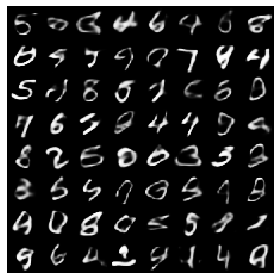

  9%|▉         | 35/400 [12:09<2:06:38, 20.82s/it]

obj_1: -112.85704803466797
obj_2: -161.4114990234375
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


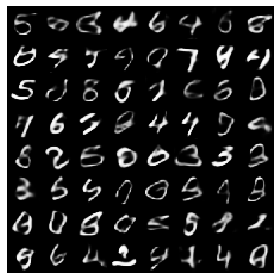

  9%|▉         | 36/400 [12:30<2:06:09, 20.79s/it]

obj_1: -114.93728637695312
obj_2: -163.68373107910156
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


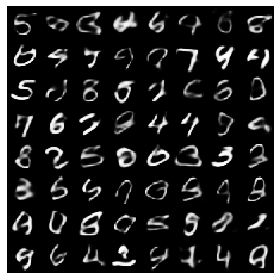

  9%|▉         | 37/400 [12:51<2:05:40, 20.77s/it]

obj_1: -114.08650207519531
obj_2: -161.9188995361328
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


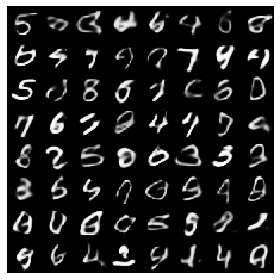

 10%|▉         | 38/400 [13:11<2:05:14, 20.76s/it]

obj_1: -114.07144165039062
obj_2: -163.126953125
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


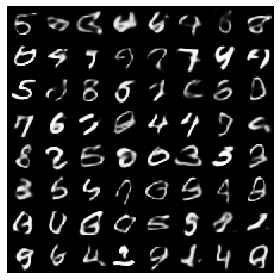

 10%|▉         | 39/400 [13:32<2:04:56, 20.77s/it]

obj_1: -110.28609466552734
obj_2: -160.79966735839844
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


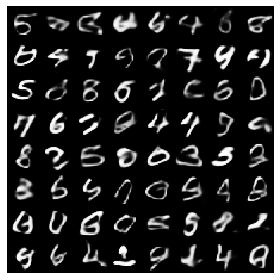

 10%|█         | 40/400 [13:53<2:04:30, 20.75s/it]

obj_1: -108.07112884521484
obj_2: -158.78155517578125
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


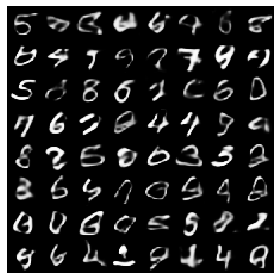

 10%|█         | 41/400 [14:14<2:04:08, 20.75s/it]

obj_1: -113.56069946289062
obj_2: -161.12570190429688
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


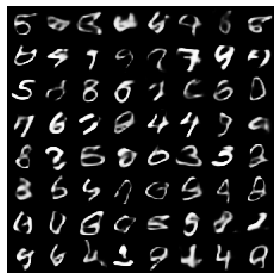

 10%|█         | 42/400 [14:34<2:03:45, 20.74s/it]

obj_1: -108.84054565429688
obj_2: -160.79205322265625
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


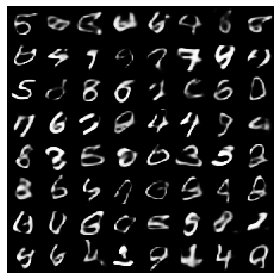

 11%|█         | 43/400 [14:55<2:03:27, 20.75s/it]

obj_1: -113.49716186523438
obj_2: -164.5966033935547
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


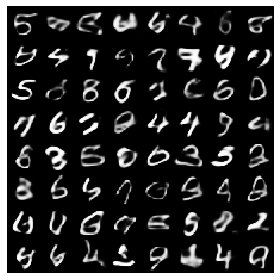

 11%|█         | 44/400 [15:16<2:03:04, 20.74s/it]

obj_1: -109.57447814941406
obj_2: -160.96316528320312
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


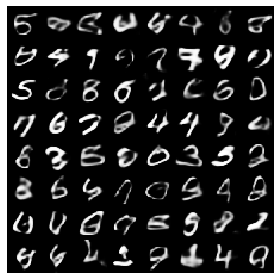

 11%|█▏        | 45/400 [15:36<2:02:42, 20.74s/it]

obj_1: -110.78541564941406
obj_2: -161.3856964111328
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


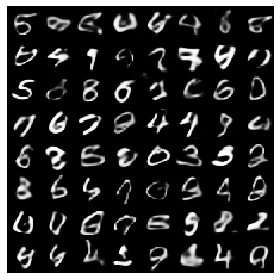

 12%|█▏        | 46/400 [15:57<2:02:20, 20.74s/it]

obj_1: -107.52490234375
obj_2: -156.82693481445312
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


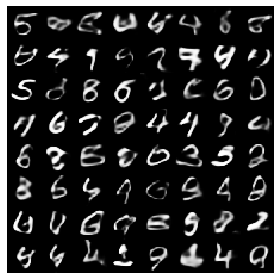

 12%|█▏        | 47/400 [16:18<2:01:59, 20.73s/it]

obj_1: -107.85812377929688
obj_2: -160.0533447265625
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


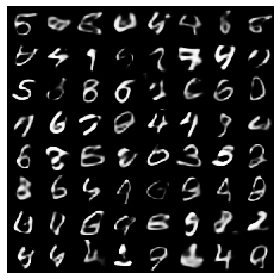

 12%|█▏        | 48/400 [16:39<2:01:37, 20.73s/it]

obj_1: -115.86978912353516
obj_2: -166.46780395507812
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


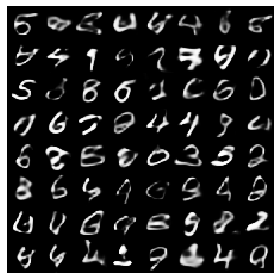

 12%|█▏        | 49/400 [16:59<2:01:15, 20.73s/it]

obj_1: -108.7802734375
obj_2: -160.03170776367188
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


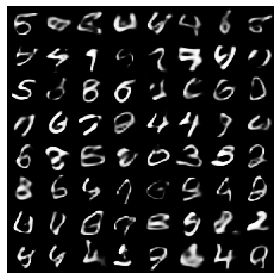

 12%|█▎        | 50/400 [17:20<2:00:54, 20.73s/it]

obj_1: -110.0009765625
obj_2: -160.7356414794922
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


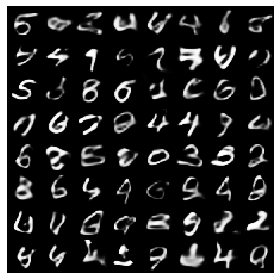

 13%|█▎        | 51/400 [17:41<2:00:33, 20.73s/it]

obj_1: -111.20899963378906
obj_2: -160.43356323242188
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


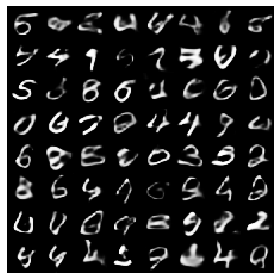

 13%|█▎        | 52/400 [18:02<2:00:12, 20.72s/it]

obj_1: -108.7220687866211
obj_2: -159.94239807128906
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


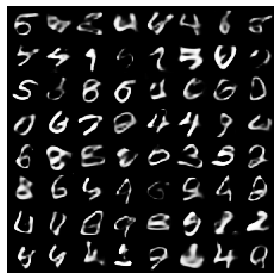

 13%|█▎        | 53/400 [18:22<1:59:55, 20.74s/it]

obj_1: -107.99039459228516
obj_2: -159.010009765625
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


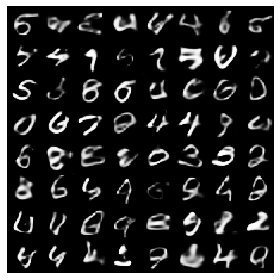

 14%|█▎        | 54/400 [18:43<1:59:33, 20.73s/it]

obj_1: -107.97441101074219
obj_2: -160.373046875
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


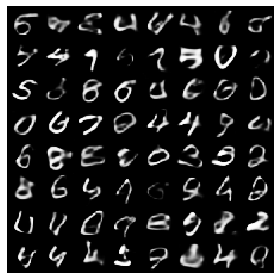

 14%|█▍        | 55/400 [19:04<1:59:12, 20.73s/it]

obj_1: -114.64866638183594
obj_2: -161.9053497314453
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


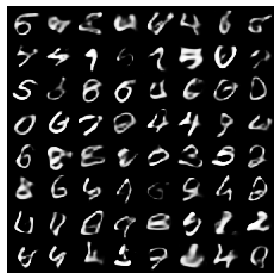

 14%|█▍        | 56/400 [19:24<1:58:51, 20.73s/it]

obj_1: -107.70997619628906
obj_2: -158.46974182128906
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


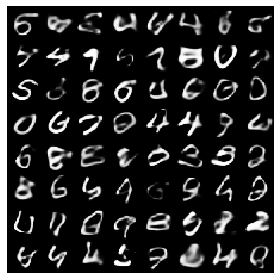

 14%|█▍        | 57/400 [19:45<1:58:32, 20.74s/it]

obj_1: -110.37947082519531
obj_2: -160.8985595703125
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


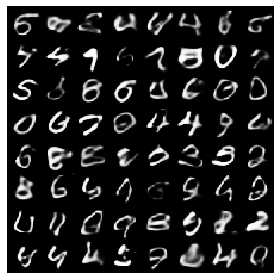

 14%|█▍        | 58/400 [20:06<1:58:11, 20.73s/it]

obj_1: -113.24297332763672
obj_2: -162.2306365966797
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


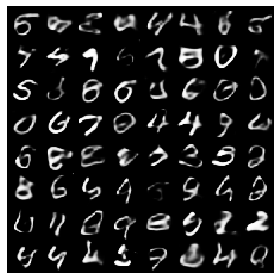

 15%|█▍        | 59/400 [20:27<1:57:50, 20.73s/it]

obj_1: -107.68140411376953
obj_2: -159.13002014160156
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


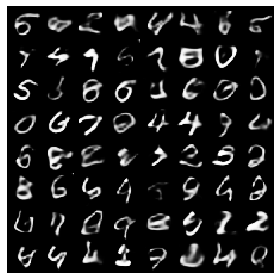

 15%|█▌        | 60/400 [20:47<1:57:28, 20.73s/it]

obj_1: -108.43952941894531
obj_2: -159.490966796875
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


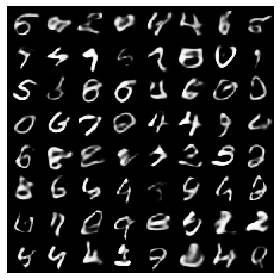

 15%|█▌        | 61/400 [21:08<1:57:07, 20.73s/it]

obj_1: -113.92996978759766
obj_2: -163.97962951660156
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


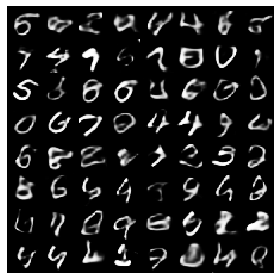

 16%|█▌        | 62/400 [21:29<1:56:48, 20.74s/it]

obj_1: -111.67301177978516
obj_2: -161.934814453125
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


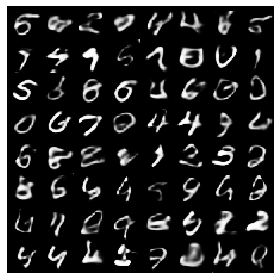

 16%|█▌        | 63/400 [21:50<1:56:26, 20.73s/it]

obj_1: -107.31765747070312
obj_2: -159.2833709716797
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


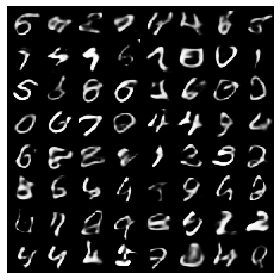

 16%|█▌        | 64/400 [22:10<1:56:05, 20.73s/it]

obj_1: -104.3561782836914
obj_2: -157.1657257080078
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


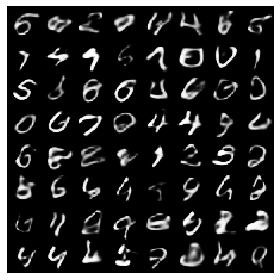

 16%|█▋        | 65/400 [22:31<1:55:44, 20.73s/it]

obj_1: -110.4960708618164
obj_2: -160.35191345214844
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


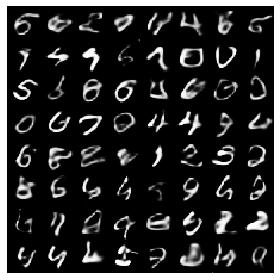

 16%|█▋        | 66/400 [22:52<1:55:23, 20.73s/it]

obj_1: -107.42416381835938
obj_2: -157.2474822998047
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


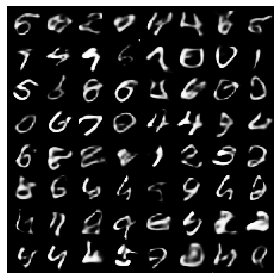

 17%|█▋        | 67/400 [23:13<1:55:05, 20.74s/it]

obj_1: -108.80989837646484
obj_2: -159.3666229248047
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


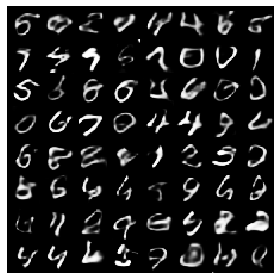

 17%|█▋        | 68/400 [23:33<1:54:44, 20.74s/it]

obj_1: -111.41883850097656
obj_2: -160.774658203125
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


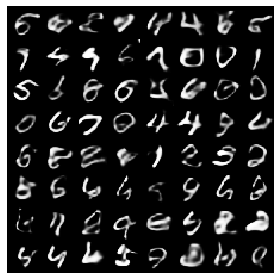

 17%|█▋        | 69/400 [23:54<1:54:22, 20.73s/it]

obj_1: -106.53206634521484
obj_2: -155.87432861328125
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


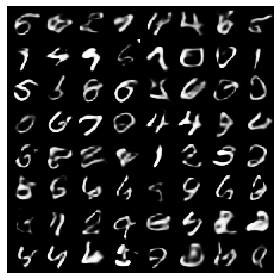

 18%|█▊        | 70/400 [24:15<1:54:01, 20.73s/it]

obj_1: -113.99130249023438
obj_2: -163.301513671875
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


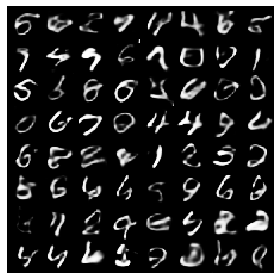

 18%|█▊        | 71/400 [24:35<1:53:39, 20.73s/it]

obj_1: -113.61245727539062
obj_2: -162.57357788085938
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


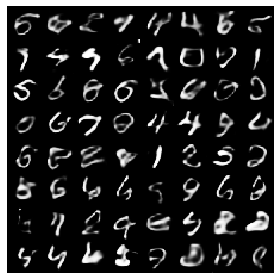

 18%|█▊        | 72/400 [24:56<1:53:18, 20.73s/it]

obj_1: -106.54783630371094
obj_2: -157.3739013671875
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


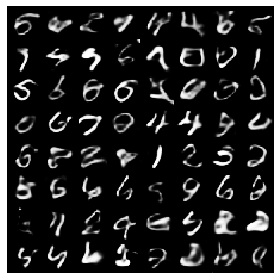

 18%|█▊        | 73/400 [25:17<1:52:58, 20.73s/it]

obj_1: -107.26800537109375
obj_2: -159.65692138671875
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


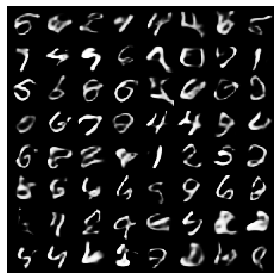

 18%|█▊        | 74/400 [25:38<1:52:38, 20.73s/it]

obj_1: -107.7726821899414
obj_2: -160.53961181640625
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


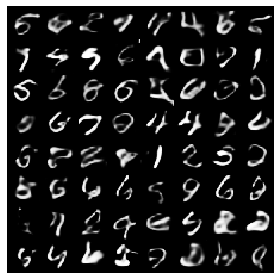

 19%|█▉        | 75/400 [25:58<1:52:19, 20.74s/it]

obj_1: -113.8857192993164
obj_2: -164.59217834472656
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


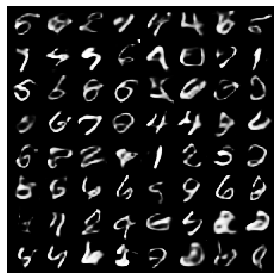

 19%|█▉        | 76/400 [26:19<1:51:58, 20.73s/it]

obj_1: -107.03743743896484
obj_2: -158.54229736328125
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


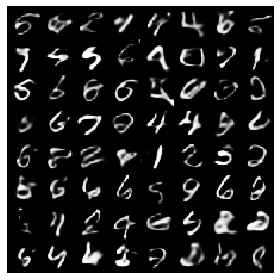

 19%|█▉        | 77/400 [26:40<1:51:36, 20.73s/it]

obj_1: -100.6927719116211
obj_2: -154.04246520996094
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


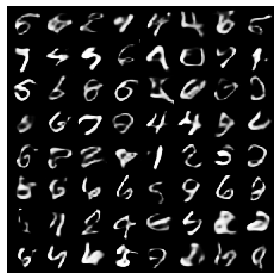

 20%|█▉        | 78/400 [27:01<1:51:15, 20.73s/it]

obj_1: -108.13680267333984
obj_2: -159.2611541748047
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


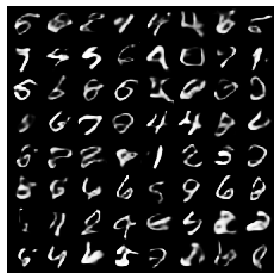

 20%|█▉        | 79/400 [27:21<1:50:54, 20.73s/it]

obj_1: -107.79661560058594
obj_2: -158.95236206054688
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


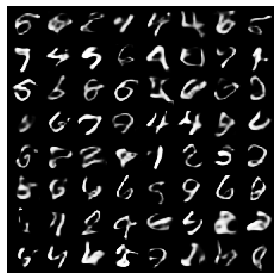

 20%|██        | 80/400 [27:42<1:50:32, 20.73s/it]

obj_1: -107.44525146484375
obj_2: -159.8603057861328
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


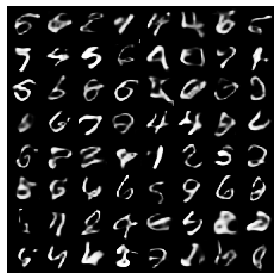

 20%|██        | 81/400 [28:03<1:50:15, 20.74s/it]

obj_1: -108.98350524902344
obj_2: -160.50230407714844
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


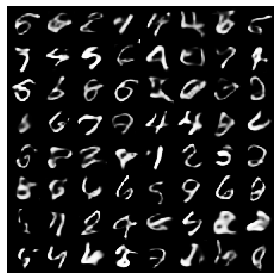

 20%|██        | 82/400 [28:24<1:49:53, 20.74s/it]

obj_1: -104.82777404785156
obj_2: -158.23907470703125
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


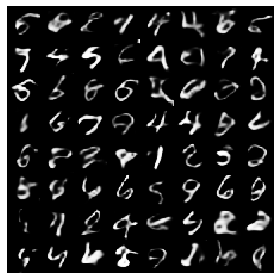

 21%|██        | 83/400 [28:44<1:49:32, 20.73s/it]

obj_1: -107.89917755126953
obj_2: -159.20632934570312
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


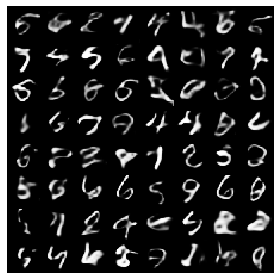

 21%|██        | 84/400 [29:05<1:49:10, 20.73s/it]

obj_1: -105.45455169677734
obj_2: -158.8420867919922
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


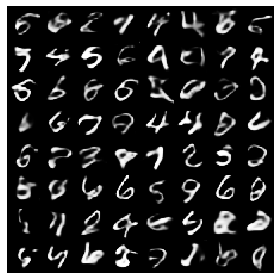

 21%|██▏       | 85/400 [29:26<1:48:49, 20.73s/it]

obj_1: -103.87116241455078
obj_2: -156.2230987548828
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


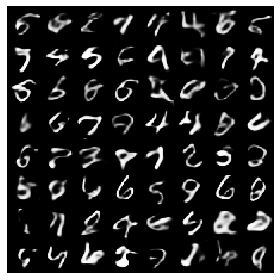

 22%|██▏       | 86/400 [29:46<1:48:29, 20.73s/it]

obj_1: -103.45858001708984
obj_2: -157.32785034179688
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


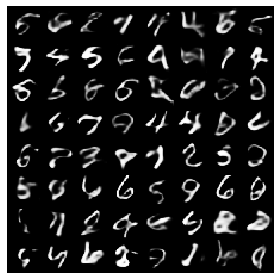

 22%|██▏       | 87/400 [30:07<1:48:08, 20.73s/it]

obj_1: -107.27981567382812
obj_2: -160.05714416503906
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


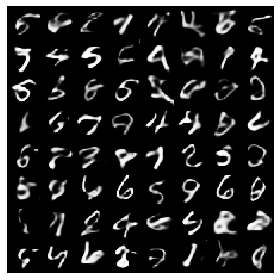

 22%|██▏       | 88/400 [30:28<1:47:47, 20.73s/it]

obj_1: -103.60212707519531
obj_2: -157.75535583496094
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


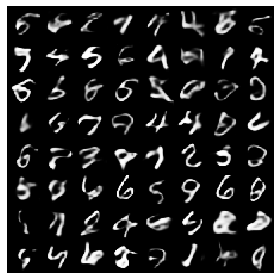

 22%|██▏       | 89/400 [30:49<1:47:27, 20.73s/it]

obj_1: -108.40150451660156
obj_2: -161.30987548828125
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


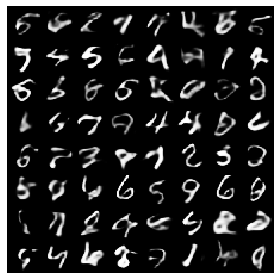

 22%|██▎       | 90/400 [31:09<1:47:06, 20.73s/it]

obj_1: -109.71309661865234
obj_2: -162.04592895507812
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


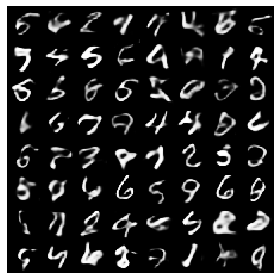

 23%|██▎       | 91/400 [31:30<1:46:45, 20.73s/it]

obj_1: -105.8117446899414
obj_2: -161.13134765625
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


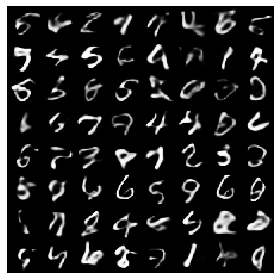

 23%|██▎       | 92/400 [31:51<1:46:23, 20.73s/it]

obj_1: -105.41950988769531
obj_2: -159.3817138671875
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


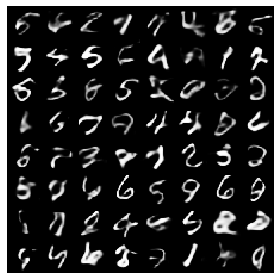

 23%|██▎       | 93/400 [32:12<1:46:02, 20.72s/it]

obj_1: -107.89289093017578
obj_2: -161.93321228027344
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


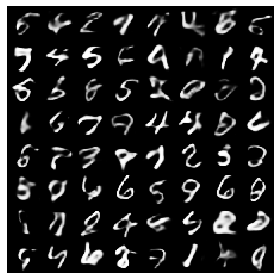

 24%|██▎       | 94/400 [32:32<1:45:41, 20.72s/it]

obj_1: -108.28338623046875
obj_2: -163.51351928710938
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


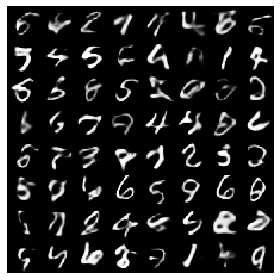

 24%|██▍       | 95/400 [32:53<1:45:24, 20.74s/it]

obj_1: -106.23280334472656
obj_2: -158.812255859375
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


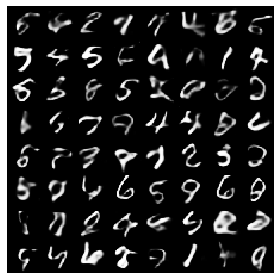

 24%|██▍       | 96/400 [33:14<1:45:03, 20.73s/it]

obj_1: -106.07743835449219
obj_2: -158.19227600097656
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


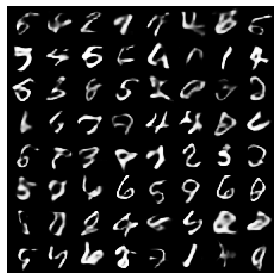

 24%|██▍       | 97/400 [33:34<1:44:41, 20.73s/it]

obj_1: -105.22772216796875
obj_2: -159.25180053710938
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


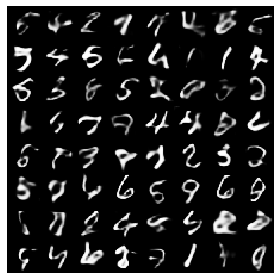

 24%|██▍       | 98/400 [33:55<1:44:20, 20.73s/it]

obj_1: -104.76942443847656
obj_2: -157.3390350341797
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


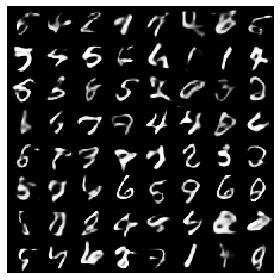

 25%|██▍       | 99/400 [34:16<1:43:58, 20.73s/it]

obj_1: -106.38349151611328
obj_2: -160.03062438964844
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


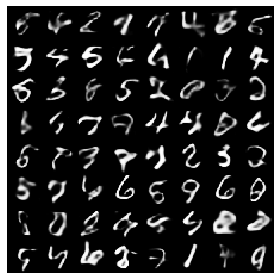

 25%|██▌       | 100/400 [34:37<1:43:37, 20.73s/it]

obj_1: -104.14139556884766
obj_2: -157.5595703125
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


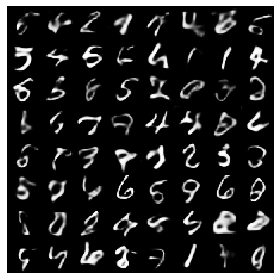

 25%|██▌       | 101/400 [34:57<1:43:17, 20.73s/it]

obj_1: -100.92202758789062
obj_2: -157.2423553466797
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


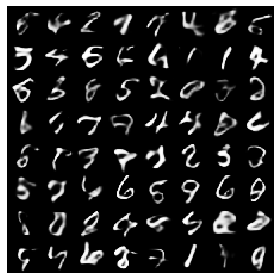

 26%|██▌       | 102/400 [35:18<1:42:56, 20.73s/it]

obj_1: -107.11726379394531
obj_2: -161.06692504882812
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


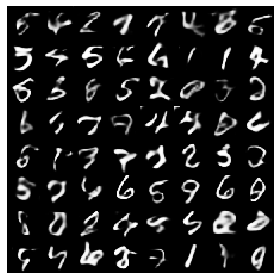

 26%|██▌       | 103/400 [35:39<1:42:37, 20.73s/it]

obj_1: -107.08036804199219
obj_2: -161.120849609375
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


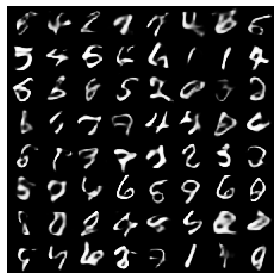

 26%|██▌       | 104/400 [36:00<1:42:16, 20.73s/it]

obj_1: -104.98045349121094
obj_2: -159.94737243652344
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


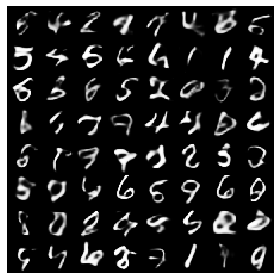

 26%|██▋       | 105/400 [36:20<1:41:54, 20.73s/it]

obj_1: -108.16968536376953
obj_2: -161.18539428710938
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


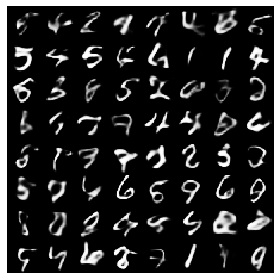

 26%|██▋       | 106/400 [36:41<1:41:36, 20.74s/it]

obj_1: -101.37139129638672
obj_2: -156.32449340820312
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


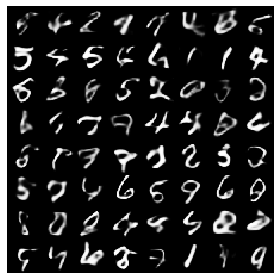

 27%|██▋       | 107/400 [37:02<1:41:14, 20.73s/it]

obj_1: -102.52734375
obj_2: -157.89402770996094
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


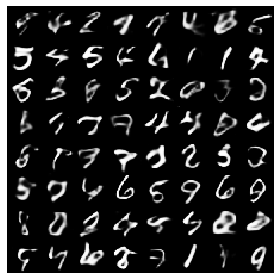

 27%|██▋       | 108/400 [37:23<1:40:54, 20.73s/it]

obj_1: -104.15524291992188
obj_2: -158.2599639892578
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


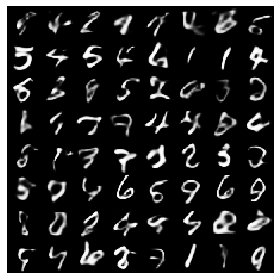

 27%|██▋       | 109/400 [37:43<1:40:36, 20.74s/it]

obj_1: -105.15995025634766
obj_2: -159.21630859375
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


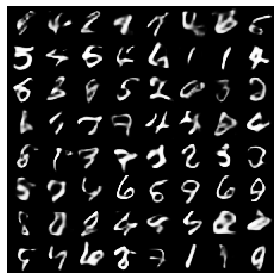

 28%|██▊       | 110/400 [38:04<1:40:13, 20.74s/it]

obj_1: -104.79469299316406
obj_2: -159.02322387695312
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


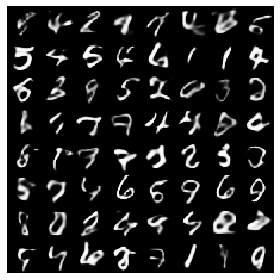

 28%|██▊       | 111/400 [38:25<1:39:53, 20.74s/it]

obj_1: -100.9031982421875
obj_2: -156.14686584472656
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


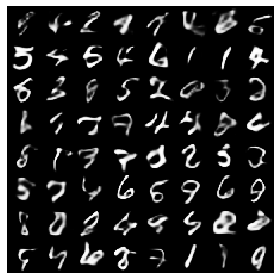

 28%|██▊       | 112/400 [38:45<1:39:31, 20.74s/it]

obj_1: -102.60440826416016
obj_2: -157.30322265625
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


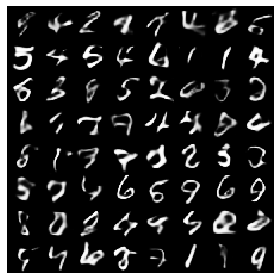

 28%|██▊       | 113/400 [39:06<1:39:10, 20.73s/it]

obj_1: -104.90879821777344
obj_2: -158.78794860839844
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


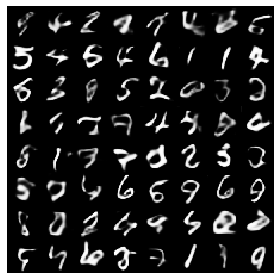

 28%|██▊       | 114/400 [39:27<1:38:49, 20.73s/it]

obj_1: -101.35316467285156
obj_2: -156.60069274902344
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


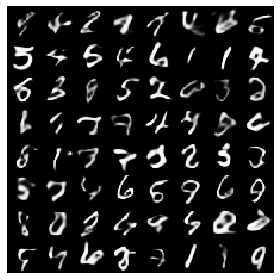

 29%|██▉       | 115/400 [39:48<1:38:28, 20.73s/it]

obj_1: -97.82242584228516
obj_2: -153.39501953125
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


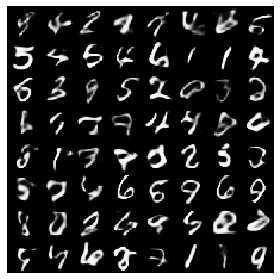

 29%|██▉       | 116/400 [40:08<1:38:07, 20.73s/it]

obj_1: -103.68553161621094
obj_2: -158.6488494873047
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


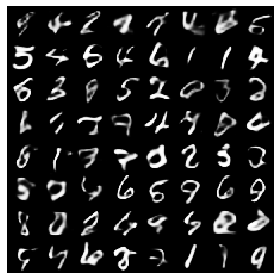

 29%|██▉       | 117/400 [40:29<1:37:46, 20.73s/it]

obj_1: -97.34075164794922
obj_2: -153.6051788330078
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


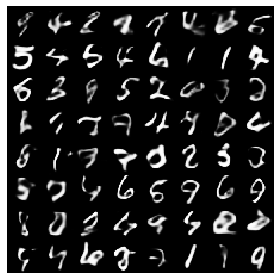

 30%|██▉       | 118/400 [40:50<1:37:25, 20.73s/it]

obj_1: -100.8255615234375
obj_2: -154.81065368652344
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


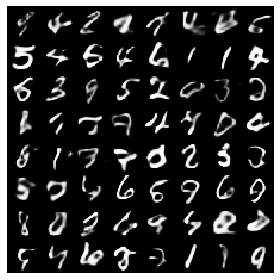

 30%|██▉       | 119/400 [41:11<1:37:04, 20.73s/it]

obj_1: -104.59707641601562
obj_2: -158.41722106933594
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


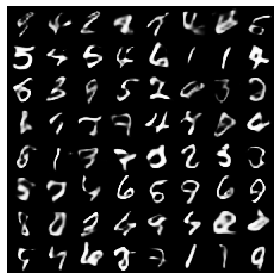

 30%|███       | 120/400 [41:31<1:36:44, 20.73s/it]

obj_1: -107.60781860351562
obj_2: -161.31407165527344
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


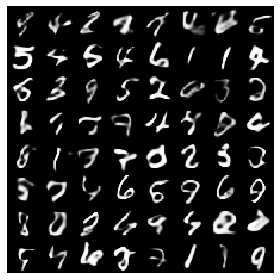

 30%|███       | 121/400 [41:52<1:36:25, 20.74s/it]

obj_1: -101.46714782714844
obj_2: -156.98654174804688
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


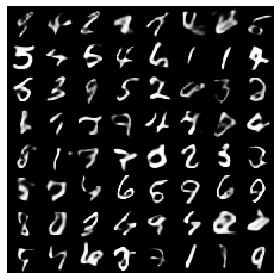

 30%|███       | 122/400 [42:13<1:36:03, 20.73s/it]

obj_1: -99.48609924316406
obj_2: -156.5318145751953
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


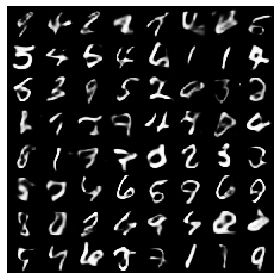

 31%|███       | 123/400 [42:34<1:35:45, 20.74s/it]

obj_1: -100.83243560791016
obj_2: -156.0552520751953
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


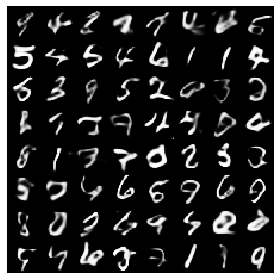

 31%|███       | 124/400 [42:54<1:35:23, 20.74s/it]

obj_1: -96.87431335449219
obj_2: -153.74253845214844
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


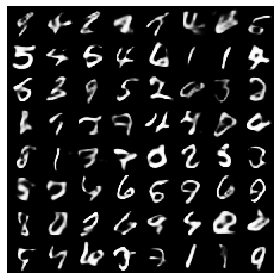

 31%|███▏      | 125/400 [43:15<1:35:06, 20.75s/it]

obj_1: -100.1729507446289
obj_2: -156.05667114257812
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


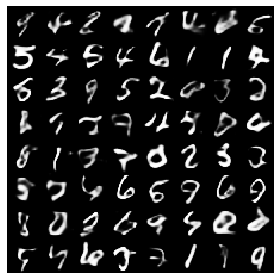

 32%|███▏      | 126/400 [43:36<1:34:47, 20.76s/it]

obj_1: -101.90804290771484
obj_2: -156.44097900390625
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


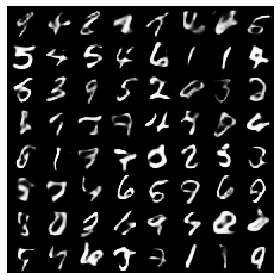

 32%|███▏      | 127/400 [43:57<1:34:25, 20.75s/it]

obj_1: -102.42997741699219
obj_2: -156.76968383789062
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


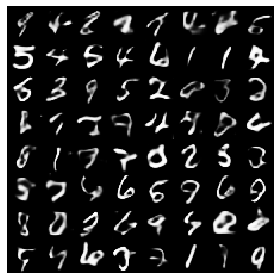

 32%|███▏      | 128/400 [44:17<1:34:03, 20.75s/it]

obj_1: -103.97835540771484
obj_2: -159.7489776611328
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


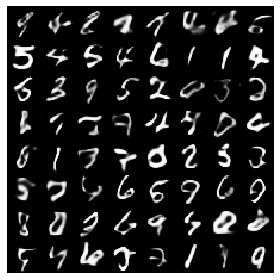

 32%|███▏      | 129/400 [44:38<1:33:42, 20.75s/it]

obj_1: -100.47705078125
obj_2: -156.96990966796875
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


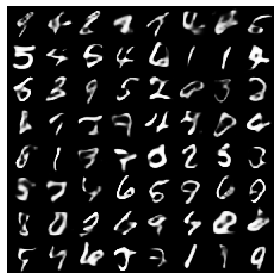

 32%|███▎      | 130/400 [44:59<1:33:20, 20.74s/it]

obj_1: -102.16695404052734
obj_2: -157.2059783935547
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


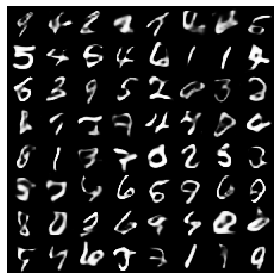

 33%|███▎      | 131/400 [45:20<1:32:58, 20.74s/it]

obj_1: -100.91281127929688
obj_2: -156.74176025390625
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


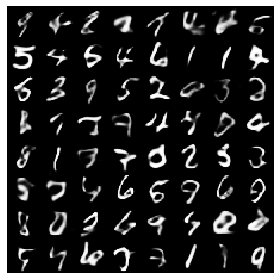

 33%|███▎      | 132/400 [45:40<1:32:37, 20.74s/it]

obj_1: -100.22341918945312
obj_2: -156.0576171875
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


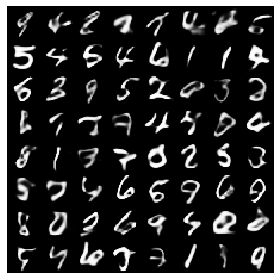

 33%|███▎      | 133/400 [46:01<1:32:16, 20.73s/it]

obj_1: -99.84260559082031
obj_2: -155.01377868652344
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


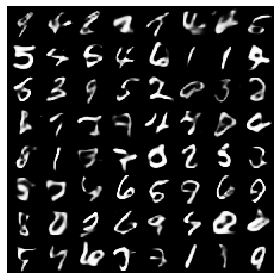

 34%|███▎      | 134/400 [46:22<1:31:55, 20.73s/it]

obj_1: -105.33032989501953
obj_2: -159.67369079589844
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


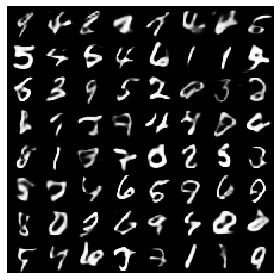

 34%|███▍      | 135/400 [46:42<1:31:34, 20.73s/it]

obj_1: -105.90349578857422
obj_2: -160.27040100097656
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


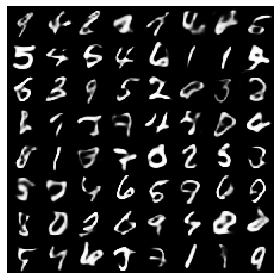

 34%|███▍      | 136/400 [47:03<1:31:13, 20.73s/it]

obj_1: -99.01898956298828
obj_2: -155.2860870361328
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


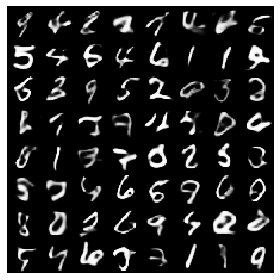

 34%|███▍      | 137/400 [47:24<1:30:54, 20.74s/it]

obj_1: -102.58113098144531
obj_2: -157.79327392578125
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


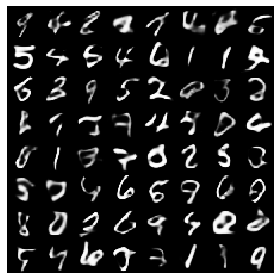

 34%|███▍      | 138/400 [47:45<1:30:35, 20.74s/it]

obj_1: -101.67456817626953
obj_2: -157.00929260253906
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


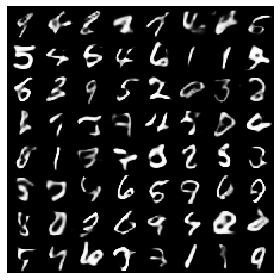

 35%|███▍      | 139/400 [48:05<1:30:13, 20.74s/it]

obj_1: -102.0638427734375
obj_2: -157.82888793945312
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


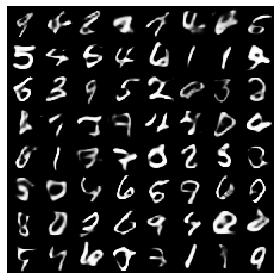

 35%|███▌      | 140/400 [48:26<1:29:53, 20.74s/it]

obj_1: -100.70903778076172
obj_2: -155.2684783935547
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


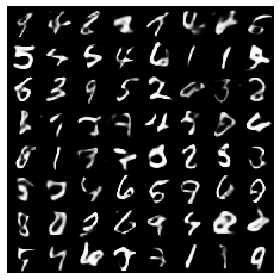

 35%|███▌      | 141/400 [48:47<1:29:33, 20.75s/it]

obj_1: -101.21607971191406
obj_2: -156.73727416992188
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


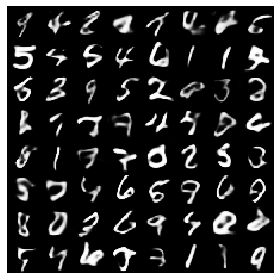

 36%|███▌      | 142/400 [49:08<1:29:12, 20.75s/it]

obj_1: -101.18231201171875
obj_2: -158.35079956054688
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


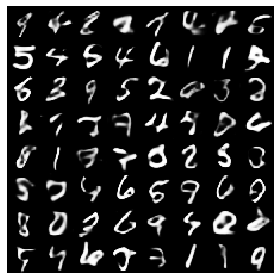

 36%|███▌      | 143/400 [49:28<1:28:50, 20.74s/it]

obj_1: -98.92947387695312
obj_2: -155.1448211669922
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


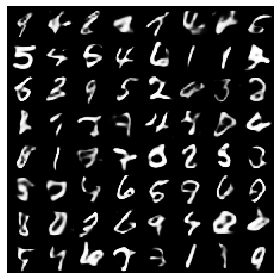

 36%|███▌      | 144/400 [49:49<1:28:30, 20.74s/it]

obj_1: -101.01295471191406
obj_2: -157.8398895263672
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


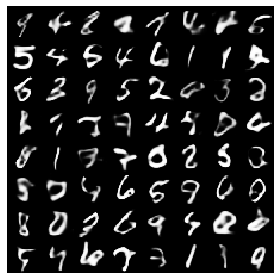

 36%|███▋      | 145/400 [50:10<1:28:08, 20.74s/it]

obj_1: -101.63246154785156
obj_2: -158.00262451171875
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


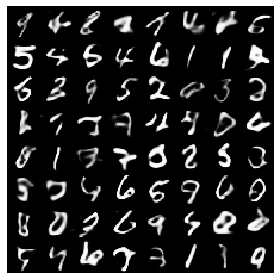

 36%|███▋      | 146/400 [50:31<1:27:46, 20.74s/it]

obj_1: -101.15308380126953
obj_2: -156.46755981445312
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


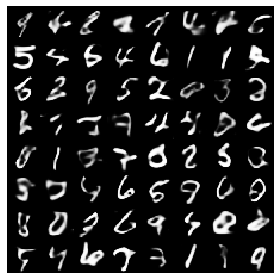

 37%|███▋      | 147/400 [50:51<1:27:25, 20.73s/it]

obj_1: -97.88875579833984
obj_2: -155.06631469726562
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


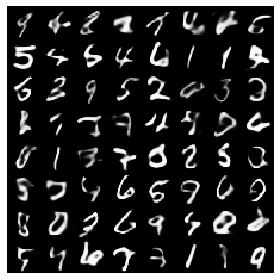

 37%|███▋      | 148/400 [51:12<1:27:05, 20.74s/it]

obj_1: -98.69300842285156
obj_2: -155.8919219970703
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


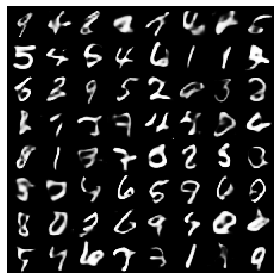

 37%|███▋      | 149/400 [51:33<1:26:44, 20.74s/it]

obj_1: -100.4305191040039
obj_2: -155.8874053955078
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


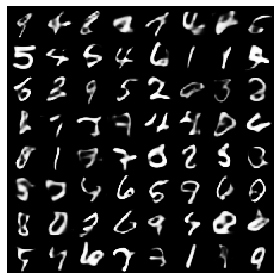

 38%|███▊      | 150/400 [51:54<1:26:23, 20.73s/it]

obj_1: -102.18771362304688
obj_2: -158.70138549804688
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


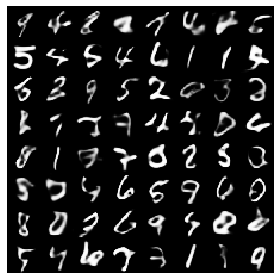

 38%|███▊      | 151/400 [52:14<1:26:04, 20.74s/it]

obj_1: -102.02796936035156
obj_2: -158.5986328125
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


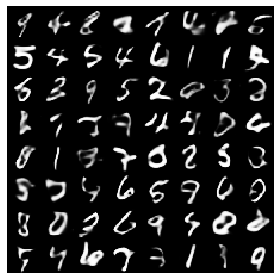

 38%|███▊      | 152/400 [52:35<1:25:43, 20.74s/it]

obj_1: -103.53397369384766
obj_2: -159.70602416992188
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


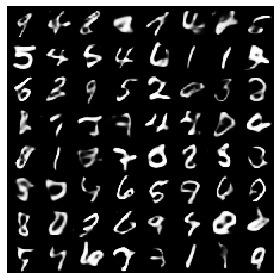

 38%|███▊      | 153/400 [52:56<1:25:21, 20.73s/it]

obj_1: -99.81217193603516
obj_2: -156.40748596191406
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


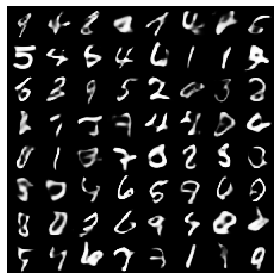

 38%|███▊      | 154/400 [53:16<1:25:00, 20.73s/it]

obj_1: -98.01695251464844
obj_2: -155.97718811035156
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


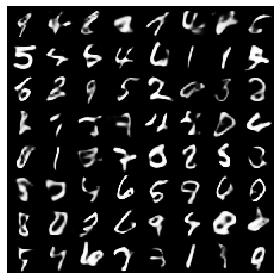

 39%|███▉      | 155/400 [53:37<1:24:40, 20.74s/it]

obj_1: -98.46599578857422
obj_2: -155.32528686523438
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


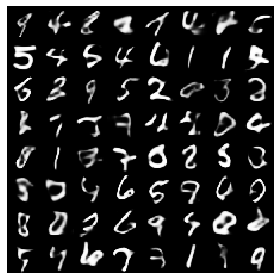

 39%|███▉      | 156/400 [53:58<1:24:18, 20.73s/it]

obj_1: -100.30885314941406
obj_2: -156.50885009765625
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


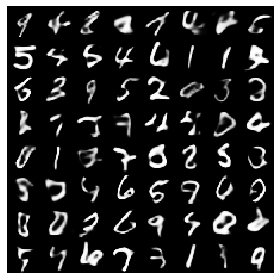

 39%|███▉      | 157/400 [54:19<1:23:57, 20.73s/it]

obj_1: -102.49234008789062
obj_2: -158.8488006591797
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


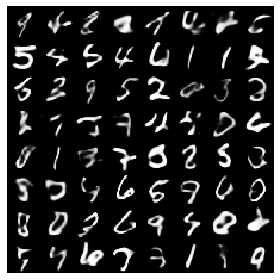

 40%|███▉      | 158/400 [54:39<1:23:36, 20.73s/it]

obj_1: -100.2286605834961
obj_2: -157.10366821289062
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


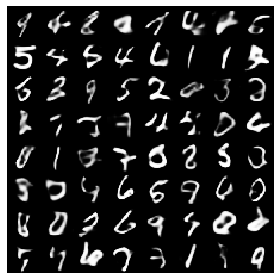

 40%|███▉      | 159/400 [55:00<1:23:16, 20.73s/it]

obj_1: -100.96112823486328
obj_2: -157.712158203125
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


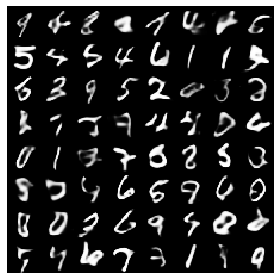

 40%|████      | 160/400 [55:21<1:22:55, 20.73s/it]

obj_1: -100.06987762451172
obj_2: -156.801513671875
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


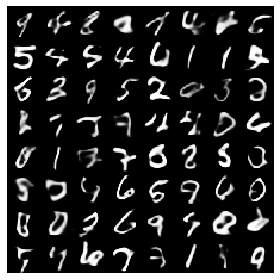

 40%|████      | 161/400 [55:42<1:22:34, 20.73s/it]

obj_1: -99.41769409179688
obj_2: -155.60794067382812
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


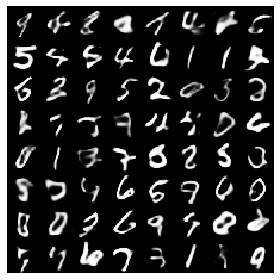

 40%|████      | 162/400 [56:02<1:22:13, 20.73s/it]

obj_1: -97.82447052001953
obj_2: -155.01698303222656
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


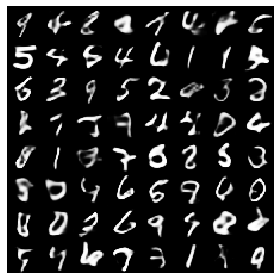

 41%|████      | 163/400 [56:23<1:21:55, 20.74s/it]

obj_1: -102.78157806396484
obj_2: -159.17652893066406
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


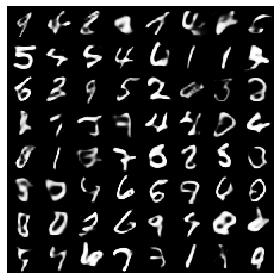

 41%|████      | 164/400 [56:44<1:21:35, 20.74s/it]

obj_1: -96.87835693359375
obj_2: -153.61776733398438
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


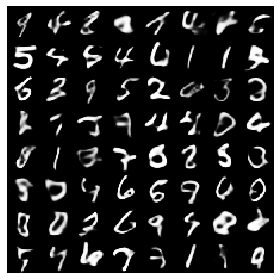

 41%|████▏     | 165/400 [57:05<1:21:15, 20.75s/it]

obj_1: -101.46372985839844
obj_2: -158.69134521484375
Saved samples to ./pics/mnist_epoch_None_K_2_N_2_amortize_True.png


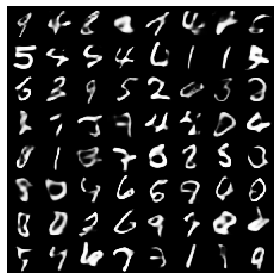

 42%|████▏     | 166/400 [57:25<1:20:53, 20.74s/it]

In [ ]:
print_info = 1
for ep in tqdm(range(args.num_epoches)):
    for b_num, batch_train in enumerate(dataset.next_train_batch()): # cycle over batches
#         pdb.set_trace()
        mu, sigma = encoder(batch_train)
        u = args.std_normal.sample(mu.shape)
        z = mu + sigma * u # reparametrization trick
        z_hmc = z.detach()
        sum_log_sigma = torch.sum(torch.log(sigma), 1)
        ###### objective for phi
        ####
        log_p = target.get_logdensity(z=z, x=batch_train)
        log_q = args.std_normal.log_prob(u).sum(1) - sum_log_sigma
        obj_1 = torch.mean(log_p - log_q)
        (-obj_1).backward()
        optimizer_phi.step()
        optimizer_phi.zero_grad()
        optimizer_theta.zero_grad()
        ###### objective for theta
        ####
        p_hmc = args.std_normal.sample(mu.shape)
        
        for k in range(args.K):
            z_hmc, p_hmc, _, _, _, _ = HMC.make_transition(q_old=z_hmc, p_old=p_hmc, target_distr=target, x=batch_train)
        obj_2 = torch.mean(target.get_logdensity(z=z_hmc, x=batch_train))
        (-obj_2).backward()
        optimizer_theta.step()
        optimizer_theta.zero_grad()
    if ep % print_info == 0:
        print('obj_1:', obj_1.cpu().detach().item())
        print('obj_2:', obj_2.cpu().detach().item())
        with torch.no_grad():
            plot_digit_samples(get_samples(target.decoder, random_code), args)

In [ ]:
num_samples = 10000

z_0 = torch.distributions.Normal(
        loc=torch.zeros(args.z_dim, dtype=torchType, device=device),
        scale=torch.ones(args.z_dim, dtype=torchType, device=device)).sample([num_samples]).requires_grad_(True)

g_samples = decoder(z_0)[0].view(num_samples, -1)

In [ ]:
def get_jacobian(x, z):
    jacobian = torch.empty(x.shape[1], z.shape[1], device=device, dtype=torchType)
    for dim in range(x.shape[1]):
        jacobian[dim, :] = torch.mean(torch.autograd.grad(x[:, dim].sum(), z, retain_graph=True)[0], dim=0)
    return jacobian

In [ ]:
mean_jac = get_jacobian(g_samples, z_0)

In [ ]:
mean_jac.shape

In [ ]:
u, s ,v = torch.svd(mean_jac)

In [ ]:
plt.plot(s.cpu().detach().numpy())
plt.yscale('log')
plt.title('Singular values decay')
plt.xlabel('Dimension number')
plt.ylabel('Singular value');